6. Calculate the yield of the areas N-9.1, N-9.2, N-9.3 without external effects. Use the long-term corrected ERA5 data as 
input. 

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import foxes
import foxes.variables as FV

# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

# Function to read and extract data from csv files
def read_csv(path):
    data = pd.read_csv(path)
    return data

In [20]:
## get timeseries-data (here ERA5 as example)
from ERA5 import load_data,calculate_wind_speed,calculate_wind_direction,calculate_averages,check_data_gaps

Era5_path = 'data/reanalysis'  
start_year = 2000
end_year = 2001
    
Era5_data = load_data(Era5_path, start_year, end_year)
Era5_data = calculate_wind_speed(Era5_data)
Era5_data = calculate_wind_direction(Era5_data)

data = Era5_data
data.columns

Index(['Time [UTC]', 'u100', 'v100', 'u10', 'v10', 'WS100', 'WS10', 'WD100',
       'WD10'],
      dtype='object')

## Task6

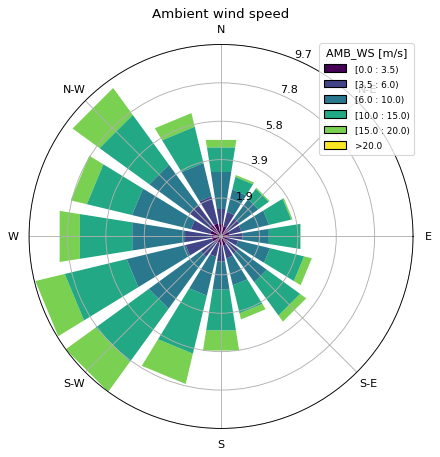

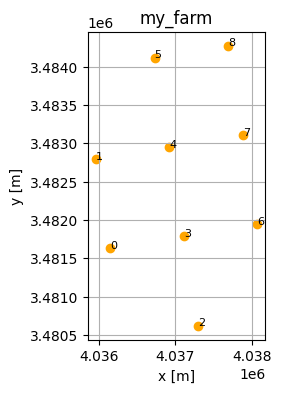

calculating wind farm power for Test for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 122.28 ms
[########################################] | 100% Completed | 11.35 s
Efficiency added to farm results


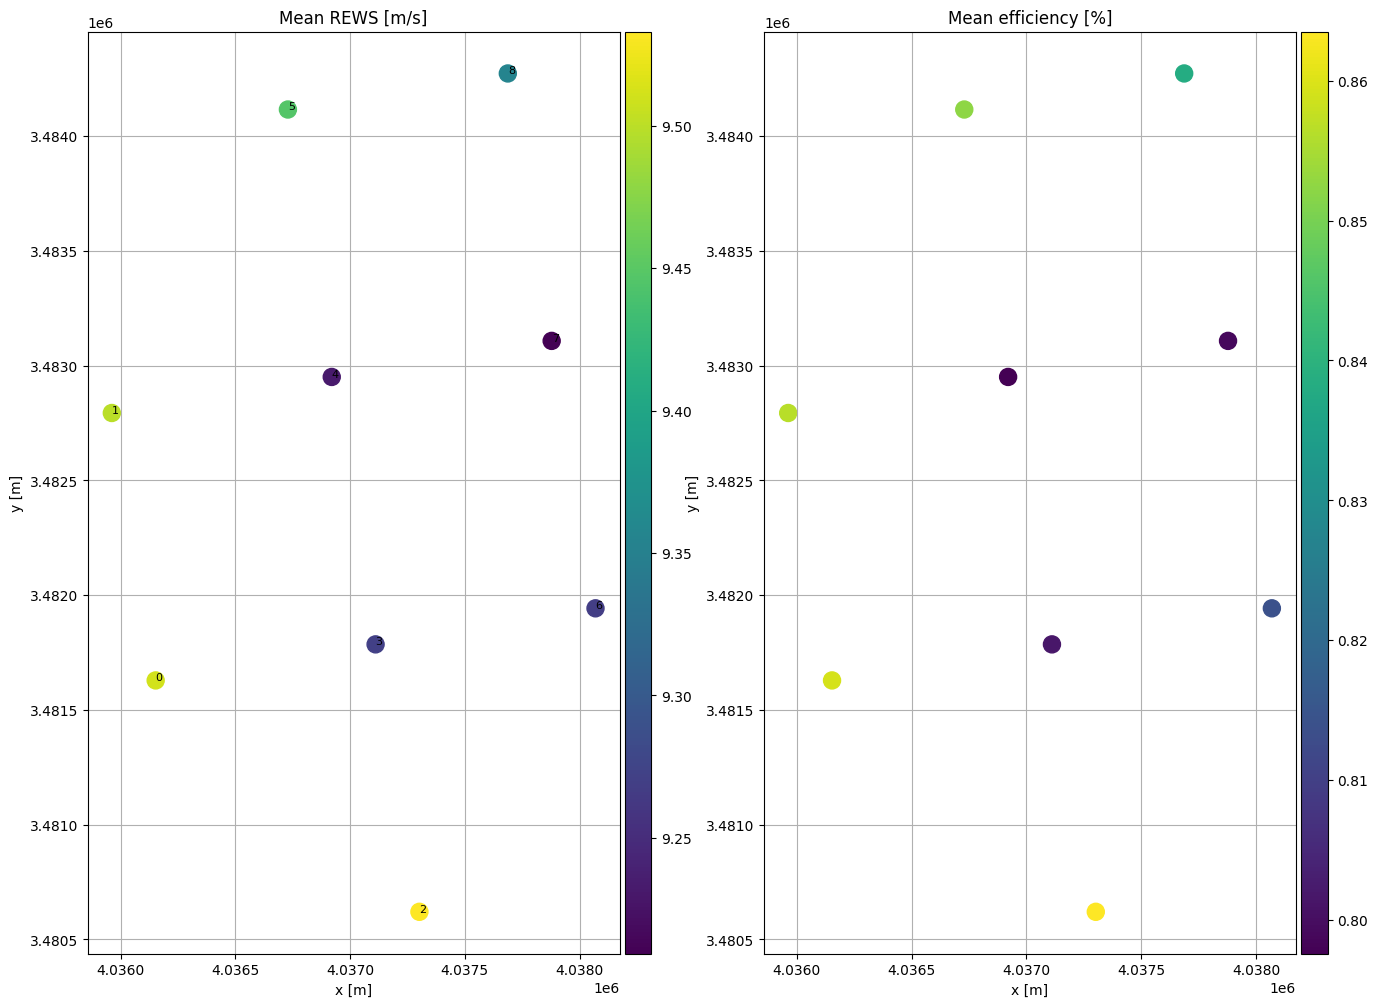


Farm power        : 76.7 MW
Farm ambient power: 83.2 MW
Farm efficiency   : 92.21 %
Annual farm yield : 671.81 GWh


In [21]:
## Running Power calculation for each Area in a function

# import the custome function
from Foxes_Farm_Power import Foxes_Farm_Power
# Foxes_Farm_Power(Farm_Layout,States,Parameters)
    # Farm   : pd.datafram containing Layout of Turbines
    # States : Wind conditions
    # Parameters: dict
        # TType         : Turbine-Type           # "NREL5MW" , "IEA15MW"
        # rotor_model   :
        # wake_models   :
        # partial_wakes :

###-------------------------------------get Turbine Layouts----------------------------------###
# create 3 Dataframes for Turbine Layouts
# current_path =  turbines_area_of_interest_path
# turb_files = os.listdir(current_path)
# Turb_dfs = [(read_csv(current_path + file),file) for file in turb_files] #read files in path to dataframe and put's those in list, also pass filename

#test
current_path =  turbines_area_of_interest_path
turb_files = os.listdir(current_path)
csv = pd.read_csv("NoWake_Layout_N-9.1.csv", skiprows = lambda x: x not in range(3))
Turb_dfs = (csv,"Test")


###----------------------------------------Add States-----------------------------------------###
# define States as Foxes object and have a look at the wind rose.
# Wind and other atmospheric inflow conditions are called `States`
States = foxes.input.states.Timeseries(                      # StatesTable for panda df or pd readable file (single height)
    data_source = data ,                                         # the data
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "WS100", FV.WD: "WD100", FV.TI: "ti"}, # Mapping from variable names to data column names
    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  # TI = Turbulanze Intensity %5 default
    )

# Plot windrose
o = foxes.output.StatesRosePlotOutput(States, point=[0., 0., 100.])
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Bastankhah2014_linear"],
    partial_wakes = None,
    )

###--------------------------------------compute farm results--------------------------------------###
#Farm_Results = []
# for Farm in Turb_dfs[0]:
#     Farm_Results.append(Foxes_Farm_Power(Farm,States,Parameters))
    
Farm_Results = Foxes_Farm_Power(Turb_dfs,States,Parameters)
        
# algo.all_models(with_states=True) ##return all models used in our algo    

In [27]:
display(Farm_Results)


,Farm power [MW],Farm ambient power [MW],Farm efficiency [%],Annual farm yield [GWh]
Test,76.691111,83.169652,92.21045,671.814132


In [23]:
####-----------------------------------------Results-------------------------------------------#####
# Note: Farm_Results is a list of dataframes

# combine df to single df
Result = Farm_Results
for i in range(len(Farm_Results)):
    Result.loc[Farm_Results[i].index[0]] = Farm_Results[i].values.flatten().tolist()

# calculate Sum for Power and Mean for Efficiency
Result.loc["Sum / Mean"] = [
    Result[Result.columns[0]].sum(),
    Result[Result.columns[1]].sum(),
    Result[Result.columns[2]].mean(),
    Result[Result.columns[3]].sum()
    ]

print(Result)

KeyError: 0

### Task 7


In [ ]:
# chose diffrent Parameters
mbook_show = foxes.ModelBook()
mbook_show.print_toc()     # print all available Models

In [ ]:
# ###--------------------------------------Important Parameters---------------------------------------###
# Parameters = dict(
#     TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
#     rotor_model   = "centre",
#     wake_models   = ["Bastankhah2014_linear"],
#     partial_wakes = None,
#     )

# ###--------------------------------------compute farm results--------------------------------------###
# Farm_Results = []
# for Farm in Turb_dfs:
#     Farm_Results.append(Foxes_Farm_Power(Farm,States,Parameters))
    
    
    